# Human Trafficking Analysis

Analysis by Vallian Sayoga

Dataset by [Andrej Marinchenko](https://www.kaggle.com/andrej0marinchenko/human-trafficking)

The FBI began accepting data on human trafficking from states in January 2013. Human trafficking includes offenses related to commercial sex acts and involuntary servitude.

This analysis includes:
1. Data cleaning
1. Data exploration
1. Descriptive statistics
1. Heatmap
1. Polynomial function to predict cases in 2021 & 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

sns.set_theme(font='JetBrains Mono',)

In [2]:
df = pd.read_csv("HT_2013-2020.csv")

In [3]:
df.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2016,MO0480600,Independence,NaN,City,MO,Missouri,West North Central,JACKSON,Midwest,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,2,0,2,0
1,2016,TX2201200,Fort Worth,NaN,City,TX,Texas,West South Central,PARKER; DENTON; TARRANT,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,1,0,0,0
2,2016,TX2270100,Austin,NaN,City,TX,Texas,West South Central,WILLIAMSON; TRAVIS,South,1B,"Cities from 500,000 thru 999,999",82,Human Trafficking,Involuntary Servitude,2,0,0,0
3,2019,NV0020100,Las Vegas Metropolitan Police Department,NaN,City,NV,Nevada,Mountain,CLARK,West,1A,"Cities 1,000,000 or over",81,Human Trafficking,Commercial Sex Acts,15,0,4,0
4,2017,AZ0070500,Chandler,NaN,City,AZ,Arizona,Mountain,MARICOPA,West,2,"Cities from 100,000 thru 249,999",81,Human Trafficking,Commercial Sex Acts,1,0,0,0


###  Finding missing values

In [4]:
df.isna().sum()

DATA_YEAR                    0
ORI                          0
PUB_AGENCY_NAME              0
PUB_AGENCY_UNIT           4203
AGENCY_TYPE_NAME             0
STATE_ABBR                   0
STATE_NAME                   0
DIVISION_NAME                0
COUNTY_NAME                111
REGION_NAME                  0
POPULATION_GROUP_CODE        0
POPULATION_GROUP_DESC        0
OFFENSE_SUBCAT_ID            0
OFFENSE_NAME                 0
OFFENSE_SUBCAT_NAME          0
ACTUAL_COUNT                 0
UNFOUNDED_COUNT              0
CLEARED_COUNT                0
JUVENILE_CLEARED_COUNT       0
dtype: int64

Most likely, `PUB_AGENCY_UNIT` is a irrelevant feature while `COUNTY_NAME` is rellevant

### Replacing missing values in `COUNTY_NAME` with its mode

In [5]:
df.COUNTY_NAME.replace(np.nan, df.COUNTY_NAME.mode()[0], inplace=True)

In [6]:
df['COUNTY_NAME'].isna().sum()

0

### Checking unique values in object typed columns

In [7]:
categorical_cols = df.select_dtypes(include='object')
for col in categorical_cols.columns:
    print(col)
    pprint(df[col].unique())
    print('------------------------')

ORI
array(['MO0480600', 'TX2201200', 'TX2270100', ..., 'KY0190800',
       'TX2203600', 'NC0360100'], dtype=object)
------------------------
PUB_AGENCY_NAME
array(['Independence', 'Fort Worth', 'Austin',
       'Las Vegas Metropolitan Police Department', 'Chandler', 'Fargo',
       'Newnan', 'DeKalb County Police Department', 'Mesa', 'Jefferson',
       'Meriwether', 'Muscogee County Schools', 'Nashville',
       'Oklahoma City', 'Bridgeton', 'Fox Valley Metro', 'Adams',
       'Bluffton', 'Gregg', 'Harris', 'Kleberg', 'Waco', 'Fairhaven',
       'Nye', 'Reno', 'Bridgeport', 'State Police:',
       'Henrico County Police Department', 'Sioux Falls', 'Yankton',
       'Tarrant', 'Round Rock', 'Portland', 'Laurinburg', 'Abilene',
       'Anchorage', 'Hennepin', 'St. Cloud', 'Isanti', 'Bowling Green',
       'Columbia', 'Lenoir City', 'Kansas City',
       'Prince George County Police Department', 'Tulsa', 'Seaford',
       'Landrum', 'Denver', 'New Castle County Police Department',
      

### Dropping irrelevant columns

In [8]:
df = df.drop(
    columns=[
        'ORI', 
        'POPULATION_GROUP_CODE',
        'OFFENSE_SUBCAT_ID',
        'UNFOUNDED_COUNT',
        'CLEARED_COUNT',
        'JUVENILE_CLEARED_COUNT',
        'OFFENSE_NAME',
        'POPULATION_GROUP_DESC',
        'STATE_NAME',
        'PUB_AGENCY_UNIT'
    ]
)

### Basic statistical descriptions

In [9]:
df.describe(include='all')

,DATA_YEAR,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,DIVISION_NAME,COUNTY_NAME,REGION_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT
count,4417.000000,4417,4417,4417,4417,4417,4417,4417,4417.000000
unique,NaN,952,7,46,9,601,4,2,NaN
top,NaN,State Police:,City,TX,West South Central,HENNEPIN,South,Commercial Sex Acts,NaN
freq,NaN,206,3081,984,1172,231,2263,3558,NaN
mean,2017.884763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173194
std,1.843414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.128820
min,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000
25%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


Based on the summary, Texas has the most cases among other states and the sub category type is CSA

### Plotting functions

In [10]:
def linechart(data, x, y, size, title, xlab, ylab, hue=None):
    plt.figure(figsize=size)
    if hue is None:
        sns.lineplot(data=data.groupby(x, as_index=False)[y].sum(),
            x=x,
            y=y,
            markers=True,
            dashes=False)
    else:
        sns.lineplot(data=data.groupby([x, hue], as_index=False)[y].sum(),
            x=x,
            y=y,
            hue=hue,
            markers=["o" for i in range(len(df[hue].unique()))],
            style=hue,
            dashes=False)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

#### Linechart of human trafficking in USA from 2013 - 2020

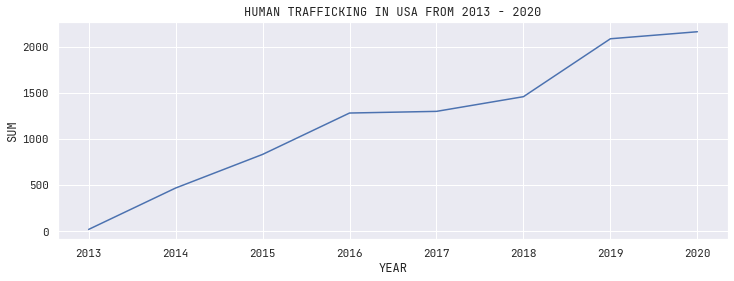

In [11]:
linechart(df, 'DATA_YEAR', 'ACTUAL_COUNT', (12,4), "HUMAN TRAFFICKING IN USA FROM 2013 - 2020", "YEAR", "SUM")

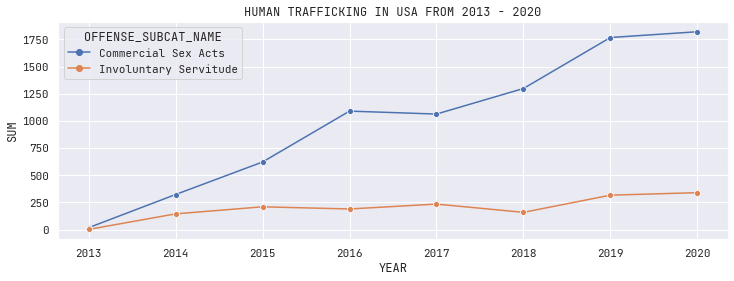

In [12]:
linechart(df, 'DATA_YEAR', 'ACTUAL_COUNT', (12,4), "HUMAN TRAFFICKING IN USA FROM 2013 - 2020", "YEAR", "SUM", "OFFENSE_SUBCAT_NAME")

#### Heatmap of numerical data correlation

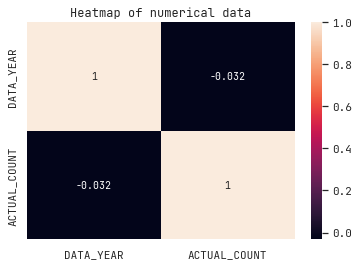

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap of numerical data")
plt.show()

The chart shows weak correlations among all of the numerical variables, except `ACTUAL_COUNT` vs `CLEARED_COUNT`

### 3 states with the worst cases for each year

In [122]:
years = df.groupby(["DATA_YEAR", "STATE_ABBR"], as_index=False).sum()
years = years.sort_values(['DATA_YEAR','ACTUAL_COUNT'], ascending=[True,False])
years.head()

,DATA_YEAR,STATE_ABBR,ACTUAL_COUNT
1,2013,MO,7
3,2013,TN,6
0,2013,KY,2
2,2013,OH,2
5,2013,WA,2


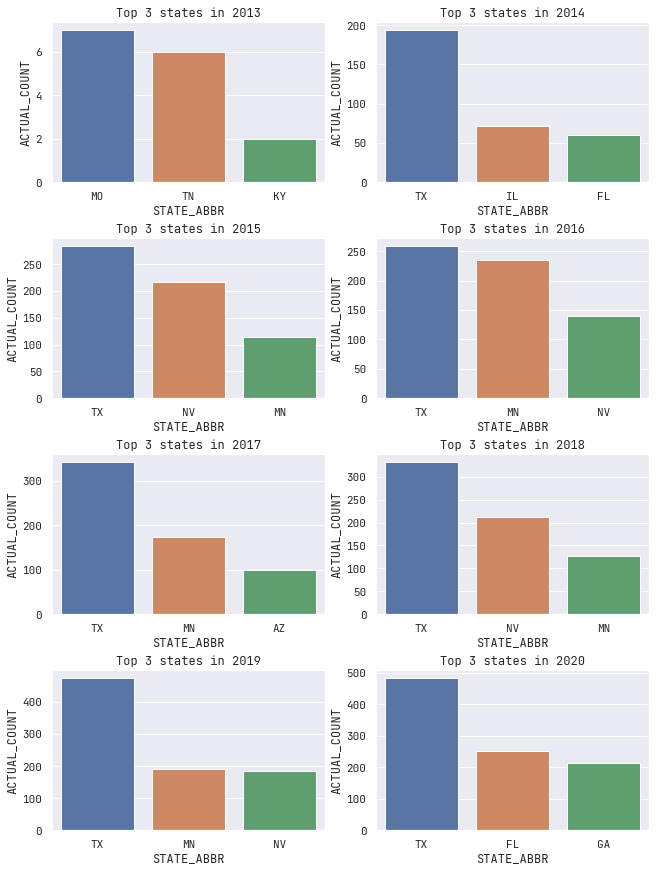

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(9,12), layout='constrained')
the_year = list(sorted(years.DATA_YEAR.unique()))
for i, year in enumerate(the_year):
    data = years.loc[years['DATA_YEAR'] == year][:3]
    ax1 = sns.barplot(
        data=data,
        y='ACTUAL_COUNT',
        x="STATE_ABBR",
        ax=axs.ravel()[i]
    )
    ax1.set(title=f"Top 3 states in {year}")
plt.show()

Human trafficking is particularly relevant to Texas because of its close proximity to the US–Mexican border, one of the most-crossed international borders in the world, and its extremely diverse population, especially in Houston.

Source: [Human trafficking in Texas](https://en.wikipedia.org/wiki/Human_trafficking_in_Texas)

### Cases distribution for each year and whole

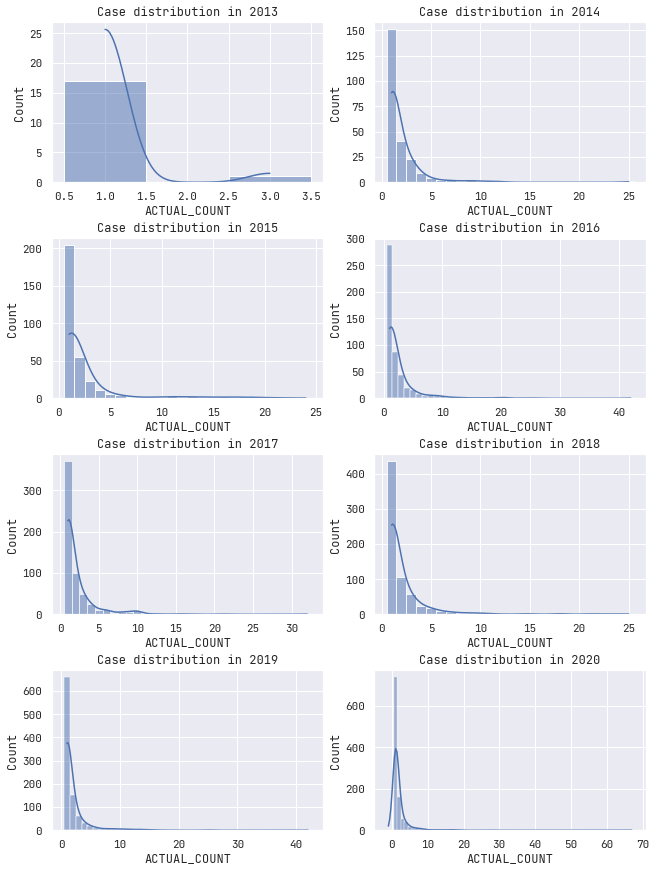

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(9,12), layout='constrained')
the_year = list(sorted(years.DATA_YEAR.unique()))
for i, year in enumerate(the_year):
    data = df.loc[df['DATA_YEAR'] == year]
    ax1 = sns.histplot(
        data=data,
        x='ACTUAL_COUNT',
        ax=axs.ravel()[i],
        discrete=True,
        kde=True
    )
    ax1.set(title=f"Case distribution in {year}")
plt.show()

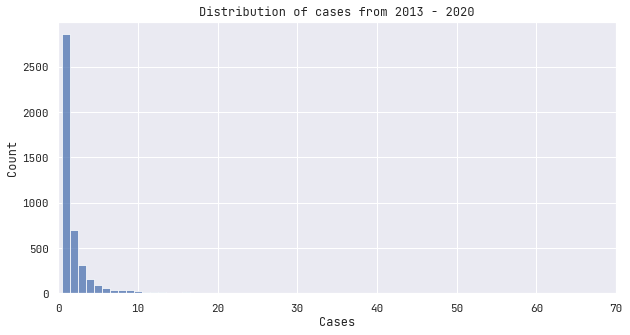

In [17]:
plt.figure(figsize=(10,5))
plt.title("Distribution of cases from 2013 - 2020")
ax = sns.histplot(df.ACTUAL_COUNT, bins=10, discrete=True)
ax.set(
    xlim=(0,70),
    ylabel="Count",
    xlabel="Cases"
)

plt.show()

### Empirical cumulative distributions

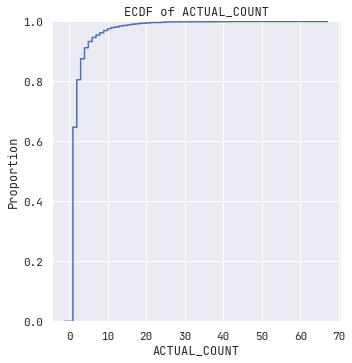

In [18]:
ax = sns.displot(df, x="ACTUAL_COUNT", kind="ecdf")
ax.set(title="ECDF of ACTUAL_COUNT",)
plt.show()

### Regression plot of `DATA_YEAR` vs sum of `ACTUAL_COUNT`

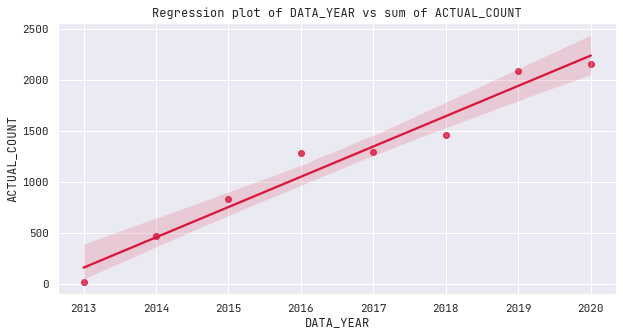

In [19]:
plt.figure(figsize=(10,5))
plt.title("Regression plot of DATA_YEAR vs sum of ACTUAL_COUNT")
sns.regplot(data=df.groupby('DATA_YEAR', as_index=False).ACTUAL_COUNT.sum(), x='DATA_YEAR', y='ACTUAL_COUNT', color='crimson')
plt.show()

According to the plot, number of cases in 2021 and 2022 are predicted to increase

# Regression modelling
For now, to make a sense on the prediction, we only use aggregated (summed) data, groupped by year only

In [47]:
data = df.groupby('DATA_YEAR', as_index=False).ACTUAL_COUNT.sum()
X = data[['DATA_YEAR']].values
y = data['ACTUAL_COUNT']

In [88]:
# Algorithms
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

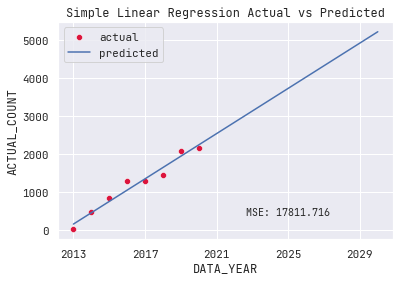

In [127]:
# Simple Linear regression
lr = LinearRegression()
lr.fit(X, y)
X_test = np.linspace(2013,2030,100)
X_test = X_test.reshape(-1,1)

lr_yhat = lr.predict(X_test)
mse = round(mean_squared_error(y, lr.predict(X)), 3)

fig, ax = plt.subplots()
sns.scatterplot(x='DATA_YEAR', y='ACTUAL_COUNT', data=data, label='actual', color='crimson', ax=ax)
sns.lineplot(x=X_test.flatten(), # A MUST!
             y=lr_yhat, label='predicted',)
plt.title("Simple Linear Regression Actual vs Predicted")
plt.text(2025, 400, f"MSE: {mse}", horizontalalignment='center')
plt.xticks(np.arange(2013,2030, 4))
plt.show()

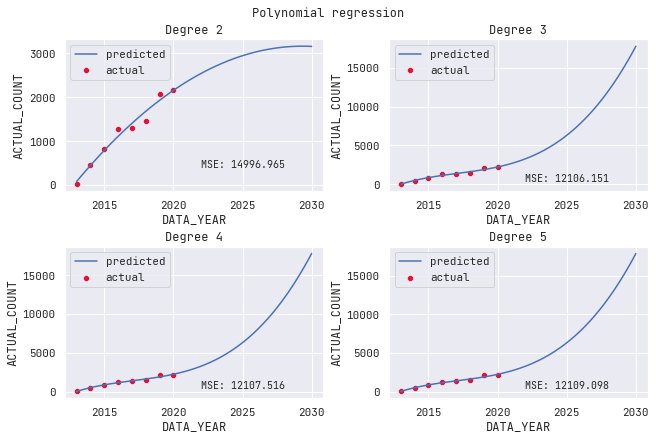

In [121]:
# Polynomial regression
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(9, 6),layout='constrained')
plt.suptitle("Polynomial regression")
for i, v in enumerate(range(2,6)):
    poly = make_pipeline(PolynomialFeatures(degree=v), LinearRegression())
    poly.fit(X,y)
    pr_yhat = poly.predict(X_test)
    mse = round(mean_squared_error(y, poly.predict(X)), 3)

    ax1 = sns.lineplot(x=X_test.flatten(), y=pr_yhat, label='predicted', ax=axs.ravel()[i])
    ax2 = sns.scatterplot(x='DATA_YEAR', y='ACTUAL_COUNT', data=data, label='actual', color='crimson', ax=axs.ravel()[i])
    ax2.set(title=f"Degree {v}")
    ax2.text(2025, 400, f"MSE: {mse}", horizontalalignment='center')
plt.show()

To conclude, every model predicted that the trend is rising. In the end, I hope that my models will be wrong.